<a href="https://colab.research.google.com/github/FLD1990/Deepleraningkc/blob/main/DL_Fernando_L%C3%B3pez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objetivo : Practica Deeplearning**

El objetivo de la práctica final del módulo de Deep Learning consiste en solucionar un problema del mundo real usando las técnicas vistas en clase. En concreto, lo que se pretende es tratar de predecir el precio de habitaciones de AirBnb utilizando para ello todas las características disponibles en el dataset.
El propósito final no es tener un sistema con una precisión altísima, sino que combinéis distintos tipos de características (numéricas, texto, imágenes...) y que expliquéis cómo lo habéis hecho.\

Implementación de un algoritmo predictivo para el precio de habitaciones
# Módulo 1: Estimación individual de precios

**A. Modelo basado en datos 1D:**

Red neuronal densa:
Diseño de una red neuronal con capas Dense para procesar datos tabulares.
Selección del número de capas y neuronas por capa.
Entrenamiento de la red neuronal con un optimizador como Adam y una función de pérdida adecuada.
Características:
Se utilizarán variables relevantes como tamaño de la habitación, tipo de cama, ubicación, etc.
Preprocesamiento de datos categóricos y numéricos.


**B. Modelo basado en imágenes:**

Arquitectura: Se probarán diferentes arquitecturas CNN como:


*   ResNet: Modelo robusto con buenas capacidades de aprendizaje profundo.
*   VGGNet: Arquitectura simple y eficiente para clasificación de imágenes.
*   EfficientNet: Modelo eficiente con buen balance entre precisión y complejidad.

Experimentos:
Entrenamiento de las arquitecturas con diferentes conjuntos de datos de imágenes de habitaciones.
Optimización de hiperparámetros como la tasa de aprendizaje, el número de epochs y el tamaño del batch.
Evaluación del rendimiento de los modelos en conjuntos de validación y prueba.
Procesamiento de imágenes:
Redimensionamiento y normalización de las imágenes.
Aumentación de datos para ampliar el conjunto de entrenamiento (opcional).

# Módulo 2: Modelo híbrido

**A. Combinación de modelos:**

Fusión temprana: Concatenación de las características de las imágenes y datos 1D antes de la entrada a la red neuronal.
Fusión tardía: Entrenamiento de dos redes independientes para imágenes y datos 1D, y posterior combinación de sus predicciones.

**B. Experimentos:**

Evaluación de diferentes estrategias de fusión:
Comparación del rendimiento de la fusión temprana y tardía.
Pruebas con diferentes arquitecturas de red neuronal para la fusión.

**C. Criterios de evaluación:**

Precisión del modelo: Medida mediante métricas como RMSE (Root Mean Square Error) o MAE (Mean Absolute Error).
Interpretabilidad del modelo: Análisis de la importancia de las diferentes características en la predicción del precio.


##Descarga y preprocesado de los datos
**(Obligatoria reconectar)**

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, concatenate
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.regularizers import l2
import cv2
import imageio as io
from google.colab import drive
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy
import pandas
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy
import pandas
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

##pd.set_option('display.max_rows', None) # para mostrar todas las filas
##pd.set_option('display.max_columns', None) # para mostrar todas las columnas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-03-03 17:45:07--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [             <=>    ]  52.85M  15.4MB/s    in 3.4s    

2024-03-03 17:45:11 (15.4 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [ ]:
data = pandas.read_csv("airbnb-listings.csv", sep = ';')
data = data.dropna(subset=['Price'])
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,16536728,https://www.airbnb.com/rooms/16536728,20170407214119,2017-04-08,Ático en el Barrio de Salamanca,Precioso ático en el barrio de Salamanca. Dos...,NaN,Precioso ático en el barrio de Salamanca. Dos...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"40.43007580267911,-3.674373225929859","Host Has Profile Pic,Is Location Exact,Require..."
1,14800288,https://www.airbnb.com/rooms/14800288,20170407214119,2017-04-08,"Salamanca Comfort XI, Friendly Rentals","Lugares de interés: Fide, Bienmesabe, Restaura...",Apartamento de nueva construcción (julio 2016)...,Apartamento de nueva construcción (julio 2016)...,none,"Localizado en el distrito de Salamanca, uno de...",...,8.0,10.0,9.0,NaN,NaN,strict,145,0.79,"40.43561324649597,-3.678321445006713","Host Has Profile Pic,Is Location Exact,Require..."
2,12357427,https://www.airbnb.com/rooms/12357427,20170407214119,2017-04-08,Apt. by the music Conservatory!!,Very bright apartment with 2 bedrooms 1 with p...,NaN,Very bright apartment with 2 bedrooms 1 with p...,none,NaN,...,8.0,8.0,8.0,NaN,NaN,flexible,1,0.43,"40.446440723481764,-3.6742595345116214","Host Has Profile Pic,Host Identity Verified,Is..."
3,7984552,https://www.airbnb.com/rooms/7984552,20170407214119,2017-04-08,Double Room near RealMadrid Stadium,The flat is on the ground floor. There's a com...,Cosy large room for two people with a flat TV ...,The flat is on the ground floor. There's a com...,none,Chamartín is an administrative district of Mad...,...,NaN,NaN,NaN,NaN,NaN,moderate,2,NaN,"40.455167347211834,-3.698099022915008","Host Is Superhost,Host Has Profile Pic,Is Loca..."
4,17244421,https://www.airbnb.com/rooms/17244421,20170407214119,2017-04-08,Mid Century Flat,Mi alojamiento es bueno para viajeros de negoc...,NaN,Mi alojamiento es bueno para viajeros de negoc...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43988285945364,-3.71737227282086","Host Has Profile Pic,Is Location Exact,Require..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,12185821,https://www.airbnb.com/rooms/12185821,20170407214119,2017-04-08,Apartamento completo una habitación,Hola! Nuestro apartamento es un lugar acogedor...,"Muy acogedor, y tenemos un ventanal que da a l...",Hola! Nuestro apartamento es un lugar acogedor...,none,Es una zona muy céntrica donde tomarte unas ca...,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.397772302001854,-3.6945501615175997","Host Has Profile Pic,Host Identity Verified,Is..."
13997,799569,https://www.airbnb.com/rooms/799569,20170407214119,2017-04-08,"PENTHOUSE/TERRACE, THE CITY CENTER",A charming and beautiful 2 independents bedroo...,A charming and beautiful 2 bedroom attic The a...,A charming and beautiful 2 independents bedroo...,none,Malasaña is considered the Bohemian district M...,...,10.0,10.0,9.0,NaN,NaN,strict,2,2.40,"40.42579998148187,-3.7040803907189943","Host Has Profile Pic,Is Location Exact,Require..."
13998,15542212,https://www.airbnb.com/rooms/15542212,20170407214119,2017-04-08,Cozy & Centric 1BD - Conde Duque,Calm and confortable apartment. Totally renewe...,Calm and confortable apartment. Totally renewe...,Calm and confortable apartment. Totally renewe...,none,Conde Duque is a dynamic and central neighborh...,...,10.0,10.0,9.0,NaN,NaN,flexible,1,0.94,"40.42616571464884,-3.7077944204488813","Host Has Profile Pic,Host Identity Verified,Is..."
13999,14725727,https://www.airbnb.com/rooms/14725727,20170407214119,2017-04-08,Room near Madrid downtown,"Highlight Places: Plaza España, Conde Duque Cu...",It is well located for access to central touri...,"Highlight Places: Plaza España, Conde Duque Cu...",none,"The neighborhood has many shops (Zara, El Cort...",

**Descarga de imágenes**

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = 3000
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

In [ ]:
images, idxs = download_images(data['Thumbnail Url'], max_imgs=3000)
images = images.astype("float32") / 255.
images.shape

NameError: name 'download_images' is not defined

Descarga de las imagenes,cirterio de la practica, marcamos un maximo de 3000 imagenes , para optimaz tiempo y recursos. al final si salen datos consistentes

In [2]:
filtered_data = data.iloc[idxs]
filtered_data
data.head(5)

NameError: name 'data' is not defined

In [ ]:
images.shape , data.shape

NameError: name 'images' is not defined

Guardamos los datos para su posterior uso /selección

In [ ]:
numpy.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [3]:
!cp images.npy /content/drive/MyDrive/images_final.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data.csv

!ls -lah images* filtered*  # Comprobación

cp: cannot stat 'images.npy': No such file or directory
cp: cannot stat 'filtered_data.csv': No such file or directory
ls: cannot access 'images*': No such file or directory
ls: cannot access 'filtered*': No such file or directory


In [2]:
# Comprobamos a abrirlos de nuevo
df = pandas.read_csv("/content/drive/MyDrive/filtered_data.csv", sep=';')
images = numpy.load("/content/drive/MyDrive/images_final.npy")
df.shape, images.shape

((1861, 89), (1861, 224, 224, 3))

#Procesamiento de datos

### Selección de Columnas:

- Se define una lista `columns_to_keep` que especifica las columnas relevantes a conservar en el DataFrame `df`.
- El DataFrame se filtra para mantener solo estas columnas.

### Limpieza de Valores Nulos:

- Se calcula la suma de valores nulos por columna usando `df.isnull().sum(axis=0)` para identificar las columnas con valores faltantes.
- Para las columnas `Bathrooms`, `Bedrooms`, `Beds`, y `Price`, se rellenan los valores nulos con la moda (el valor más frecuente) de cada columna respectiva.
- Finalmente, se elimina cualquier fila que todavía contenga valores nulos con `df.dropna()`, lo que podría referirse a otras columnas no especificadas aquí.

### Codificación de Variables Categóricas:

- Se identifican las variables categóricas `Property Type`, `Room Type`, y `Bed Type`.
- Se utiliza `LabelEncoder` de scikit-learn para transformar estas variables categóricas en valores numéricos. Esto es útil para modelos de machine learning que requieren entradas numéricas.
- `LabelEncoder` se ajusta a cada una de las columnas categóricas mencionadas y luego se utiliza para transformar sus valores en el DataFrame `df`.

### Visualización del DataFrame:

- Se muestra la transposición del DataFrame `df` (`.T`) para los primeros 5 registros con `df.head().T`, proporcionando una vista rápida de las transformaciones aplicadas a las columnas seleccionadas.


In [3]:
def drop_colums_dataframe(df, drop_colums):

    df = df.drop(drop_colums, axis=1)

    return df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1861 non-null   int64  
 1   Listing Url                     1861 non-null   object 
 2   Scrape ID                       1861 non-null   int64  
 3   Last Scraped                    1861 non-null   object 
 4   Name                            1861 non-null   object 
 5   Summary                         1788 non-null   object 
 6   Space                           1369 non-null   object 
 7   Description                     1860 non-null   object 
 8   Experiences Offered             1861 non-null   object 
 9   Neighborhood Overview           1162 non-null   object 
 10  Notes                           664 non-null    object 
 11  Transit                         1156 non-null   object 
 12  Access                          10

In [5]:
    columns_to_keep = ['Property Type', 'Room Type', 'Bathrooms',
                       'Bedrooms', 'Beds', 'Bed Type','Price',
                       'Minimum Nights', 'Availability 30', 'Number of Reviews',
                      'Guests Included']

    # Solo conserva las columnas definidas en 'columns_to_keep'
    df = df[columns_to_keep]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Type      1861 non-null   object 
 1   Room Type          1861 non-null   object 
 2   Bathrooms          1848 non-null   float64
 3   Bedrooms           1858 non-null   float64
 4   Beds               1850 non-null   float64
 5   Bed Type           1861 non-null   object 
 6   Price              1861 non-null   float64
 7   Minimum Nights     1861 non-null   int64  
 8   Availability 30    1861 non-null   int64  
 9   Number of Reviews  1861 non-null   int64  
 10  Guests Included    1861 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 160.1+ KB


In [7]:
df.isnull().sum(axis=0)

Property Type         0
Room Type             0
Bathrooms            13
Bedrooms              3
Beds                 11
Bed Type              0
Price                 0
Minimum Nights        0
Availability 30       0
Number of Reviews     0
Guests Included       0
dtype: int64

In [8]:
#Las variables que contienen NaN vamos a utilizar la moda para inicializarlos
df = df.fillna(value={"Bathrooms":df["Bathrooms"].mode()[0]})
df = df.fillna(value={"Bedrooms":df["Bedrooms"].mode()[0]})
df = df.fillna(value={"Beds":df["Beds"].mode()[0]})
df = df.fillna(value={"Price":df["Price"].mode()[0]})

#las que no tienen imagen las eliminamos tambien
df = df.dropna()

In [9]:
df.isnull().sum(axis=0)

Property Type        0
Room Type            0
Bathrooms            0
Bedrooms             0
Beds                 0
Bed Type             0
Price                0
Minimum Nights       0
Availability 30      0
Number of Reviews    0
Guests Included      0
dtype: int64

In [10]:
df.info()
#df.head(5)
#print(data['Minimum Nights'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Type      1861 non-null   object 
 1   Room Type          1861 non-null   object 
 2   Bathrooms          1861 non-null   float64
 3   Bedrooms           1861 non-null   float64
 4   Beds               1861 non-null   float64
 5   Bed Type           1861 non-null   object 
 6   Price              1861 non-null   float64
 7   Minimum Nights     1861 non-null   int64  
 8   Availability 30    1861 non-null   int64  
 9   Number of Reviews  1861 non-null   int64  
 10  Guests Included    1861 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 160.1+ KB


In [11]:
Var_Ind = ['Property Type', 'Room Type', 'Bathrooms',
                       'Bedrooms', 'Beds', 'Bed Type',
                       'Minimum Nights', 'Availability 30', 'Number of Reviews',
                      'Guests Included']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Type      1861 non-null   object 
 1   Room Type          1861 non-null   object 
 2   Bathrooms          1861 non-null   float64
 3   Bedrooms           1861 non-null   float64
 4   Beds               1861 non-null   float64
 5   Bed Type           1861 non-null   object 
 6   Price              1861 non-null   float64
 7   Minimum Nights     1861 non-null   int64  
 8   Availability 30    1861 non-null   int64  
 9   Number of Reviews  1861 non-null   int64  
 10  Guests Included    1861 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 160.1+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

#Normalizar los datos de variables categoricas
property_type = LabelEncoder()
property_type.fit(df['Property Type'])
df['Property Type'] = property_type.transform(df['Property Type'])
room_type = LabelEncoder()
room_type.fit(df['Room Type'])
df['Room Type'] = room_type.transform(df['Room Type'])
BedType = LabelEncoder()
BedType.fit(df['Bed Type'])
df['Bed Type'] = BedType.transform(df['Bed Type'])

df.head().T

,0,1,2,3,4
Property Type,0.0,0.0,0.0,0.0,0.0
Room Type,0.0,0.0,0.0,1.0,0.0
Bathrooms,2.0,1.0,1.0,1.5,1.0
Bedrooms,2.0,2.0,1.0,1.0,2.0
Beds,5.0,2.0,1.0,1.0,3.0
Bed Type,4.0,4.0,4.0,4.0,4.0
Price,70.0,110.0,60.0,70.0,70.0
Minimum Nights,2.0,2.0,1.0,1.0,2.0
Availability 30,4.0,22.0,0.0,0.0,0.0
Number of Reviews,5.0,5.0,0.0,0.0,6.0


In [13]:
df.shape


(1861, 11)

##División de datos

El proceso de división de los datos involucra separar el conjunto de datos en conjuntos de entrenamiento, validación y prueba para dos tipos de datos: imágenes (`X_images`, `y_images`) y datos tabulares (`X_tab`, `y_tab`). Estos son los pasos seguidos:

### Datos Tabulares
1. **Separación Inicial de Datos Tabulares:**
   - Se dividen los datos tabulares en características independientes `X_tab` (excluyendo la columna 'Price') y la variable objetivo `y_tab` ('Price').
   - Luego, se realiza una primera división utilizando `train_test_split` para separar los datos en un conjunto de entrenamiento preliminar (`X_tab_train_pre`, `y_tab_train_pre`) y un conjunto de prueba (`X_tab_test`, `y_tab_test`), con un tamaño de prueba del 20% y una semilla aleatoria de 42.

2. **División de Entrenamiento y Validación para Datos Tabulares:**
   - A partir del conjunto de entrenamiento preliminar, se realiza una segunda división para obtener los conjuntos de entrenamiento final (`X_tab_train`, `y_tab_train`) y de validación (`X_tab_val`, `y_tab_val`), con un tamaño de prueba (validación en este contexto) del 20% y la misma semilla aleatoria.

### Datos de Imágenes
1. **Separación Inicial de Datos de Imágenes:**
   - Similar a los datos tabulares, los datos de imágenes se dividen inicialmente en un conjunto de entrenamiento preliminar (`X_images_train_pre`, `y_images_train_pre`) y un conjunto de prueba (`X_images_test`, `y_images_test`), siguiendo los mismos parámetros de división.

2. **División de Entrenamiento y Validación para Datos de Imágenes:**
   - A partir del conjunto de entrenamiento preliminar de imágenes, se realiza una segunda división para obtener los conjuntos de entren


In [14]:
## Division de los datos

from sklearn.model_selection import train_test_split
X_images = images
y_images = df['Price']

X_tab = df.drop('Price', axis=1)
y_tab = df['Price']  # Se determina la variable objetivo

X_tab_train_pre, X_tab_test, y_tab_train_pre, y_tab_test = train_test_split(X_tab, y_tab, test_size=0.2, random_state=42)

X_tab_train, X_tab_val, y_tab_train, y_tab_val = train_test_split(X_tab_train_pre, y_tab_train_pre, test_size=0.2, random_state=42)

X_images_train_pre, X_images_test, y_images_train_pre, y_images_test = train_test_split(X_images, y_images, test_size=0.2, random_state=42)

X_images_train, X_images_val, y_images_train, y_images_val = train_test_split(X_images_train_pre, y_images_train_pre, test_size=0.2, random_state=42)



### Escalado de las Características Numéricas

El proceso de escalado de las características numéricas asegura que todas las variables independientes contribuyan equitativamente al modelo de aprendizaje automático, mejorando así su rendimiento y estabilidad. Se realiza de la siguiente manera:

1. **Inicialización del Escalador:**
   - Se utiliza `StandardScaler` de `sklearn.preprocessing` para inicializar el escalador, que estandariza las características eliminando la media y escalando a varianza unitaria.

2. **Ajuste y Transformación en el Conjunto de Entrenamiento:**
   - El escalador se ajusta (`fit`) y transforma (`transform`) solo con los datos de entrenamiento (`X_tab_train`) para las variables numéricas específicas (`Var_Ind`), lo que implica calcular la media y la desviación estándar para cada característica, y luego usar estos valores para escalar los datos.

3. **Transformación de los Conjuntos de Validación y Prueba:**
   - Los conjuntos de validación (`X_tab_val`) y prueba (`X_tab_test`) se transforman utilizando el mismo escalador (`scaler.transform`) ajustado con los datos de entrenamiento. Esto asegura que la transformación aplicada sea consistente a través de todos los conjuntos de datos, utilizando la misma media y desviación estándar calculadas durante el ajuste con el conjunto de entrenamiento.

Este enfoque mantiene la integridad de los datos de prueba y validación al evitar el riesgo de fuga de datos (data leakage) y garantiza que el modelo se evalúe en condiciones que simulan datos no vistos durante el entrenamiento.


In [15]:
# Escalado de las caracteristicas numericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajusto el escaler solo con datos de entrenamiento
scaler.fit_transform(X_tab_train[Var_Ind])

# Transformar los conjuntos train, validacion y test
X_tab_val[Var_Ind] = scaler.transform(X_tab_val[Var_Ind])
X_tab_test[Var_Ind] = scaler.transform(X_tab_test[Var_Ind])


In [16]:
# Determino las columnas categoricas (de tipo 'object' y 'category')

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Variables categóricas en el DataFrame:")
print(categorical_columns)

df.info()


Variables categóricas en el DataFrame:
Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Type      1861 non-null   int64  
 1   Room Type          1861 non-null   int64  
 2   Bathrooms          1861 non-null   float64
 3   Bedrooms           1861 non-null   float64
 4   Beds               1861 non-null   float64
 5   Bed Type           1861 non-null   int64  
 6   Price              1861 non-null   float64
 7   Minimum Nights     1861 non-null   int64  
 8   Availability 30    1861 non-null   int64  
 9   Number of Reviews  1861 non-null   int64  
 10  Guests Included    1861 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 160.1 KB


Para mejorar el rendimiento del modelo y asegurar que todas las características de las imágenes tengan la misma escala, se centran y normalizan las imágenes de la siguiente manera:

1. **Cálculo de la Media:**
   - Se calcula la media de todas las imágenes en el conjunto de entrenamiento (`X_images_train`) a lo largo del eje 0, resultando en `X_images_train_mean`. Este paso centra los datos restando esta media a cada imagen.

2. **Centrado de las Imágenes de Entrenamiento:**
   - A cada imagen en el conjunto de entrenamiento se le resta la media calculada anteriormente (`X_images_train_mean`), obteniendo así `X_images_train_cent`. Este proceso centra los datos alrededor de cero.

3. **Normalización de las Imágenes de Entrenamiento:**
   - Se calcula la desviación estándar de las imágenes centradas en el conjunto de entrenamiento (`X_images_train_cent`), resultando en `X_images_train_std`.
   - Las imágenes centradas se dividen por esta desviación estándar, normalizando así las imágenes en términos de su escala de varianza.

4. **Aplicación a Conjuntos de Test y Validación:**
   - Las imágenes en los conjuntos de test (`X_images_test`) y validación (`X_images_val`) también se centran y normalizan utilizando la media (`X_images_train_mean`) y la desviación estándar (`X_images_train_std`) calculadas únicamente a partir del conjunto de entrenamiento.
   - Este enfoque asegura que la transformación aplicada sea consistente a través de todos los conjuntos de datos y previene la fuga de información del conjunto de entrenamiento al de validación o test.

Este proceso garantiza que todas las imágenes, independientemente del conjunto al que pertenezcan, se procesen de manera uniforme, mejorando así la capacidad del modelo para aprender de Los datos de manera eficiente


In [17]:
X_images_train_mean = np.mean(X_images_train, axis=0)
X_images_train_cent = X_images_train - X_images_train_mean
X_images_train_std = np.std(X_images_train, axis=0)
X_images_train = X_images_train_cent / X_images_train_std
X_images_test = (X_images_test - X_images_train_mean) / X_images_train_std
X_images_val = (X_images_val - X_images_train_mean) / X_images_train_std

In [35]:
# Generare una prediccion con una RL para tener una referencia.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear y entrenar el modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_tab_train, y_tab_train)

# Predecir y evaluar el modelo
y_tab_pred = model_lr.predict(X_tab_test)
mse = mean_squared_error(y_tab_test, y_tab_pred)
mae = mean_absolute_error(y_tab_test, y_tab_pred)

print(f'El Error Cuadratico Medio (MSE) es: {mse} , Acuraccy es: {mae}')

El Error Cuadratico Medio (MSE) es: 6823.277688525456 , Acuraccy es: 59.51815120018282


## Modelo de Red Neuronal Convolucional Nivel 1: Estructura Simplificada

Este modelo representa el nivel más básico de complejidad, con solo una capa convolucional seguida de una capa de pooling, una capa de aplanamiento, y una capa densa antes de la capa de salida. Está diseñado para realizar tareas de regresión.

### Estructura del Modelo

1. **Capa Convolucional:**
   - `Conv2D` con 16 filtros, un kernel de tamaño `(3, 3)`, y activación 'relu'.
   - El `input_shape` se establece en `(224, 224, 3)`, asumiendo imágenes a color de tamaño 224x224.

2. **Capa de Pooling:**
   - `MaxPooling2D` con un tamaño de ventana `(2, 2)` para reducir la dimensionalidad.

3. **Aplanamiento:**
   - `Flatten` para convertir las matrices de características en un vector único que pueda ser procesado por capas densas.

4. **Capa Densa (Salida):**
   - Una capa `Dense` con una sola unidad y activación 'linear', adecuada para regresión.

### Compilación

- El modelo se compila con la función de pérdida `'mse'` (error cuadrático medio) para regresión, utilizando el optimizador `'adam'` y monitoreando el `'mae'` (error absoluto medio) como métrica de rendimiento.

### Entrenamiento

- El entrenamiento se realiza sobre los conjuntos de datos de entrenamiento y validación especificados (`X_images_train`, `y_images_train`, `X_images_val`, `y_images_val`), con 10 épocas y un tamaño de lote de 20.

Este enfoque proporciona una introducción sencilla al uso de redes neuronales convolucionales para tareas de regresión, enfatizando la simplicidad y la eficiencia en la estructura del modelo.


In [40]:
#Nivel 1 mas sencillo (solo una capa convolucional y una capa densa antes de la capa de salida)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Inicializo el modelo
model_images = Sequential()

# Estructura muy simplificada
model_images.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_images.add(MaxPooling2D((2, 2)))
model_images.add(Flatten())
model_images.add(Dense(1, activation='linear'))  # Asumiendo regresión

# Compilación del modelo
model_images.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Resumen del modelo
model_images.summary()

# Entrenamiento del modelo
history0 = model_images.fit(X_images_train, y_images_train, epochs=10, batch_size=20, validation_data=(X_images_val, y_images_val ))



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 197136)            0         
                                                                 
 dense_6 (Dense)             (None, 1)                 197137    
                                                                 
Total params: 197585 (771.82 KB)
Trainable params: 197585 (771.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
60/60 [==============================] - 38s 614ms/step - loss: 3332.

## Análisis de Resultados del Modelo Simplificado

El modelo "sequential_3", una red neuronal convolucional simplificada, muestra los siguientes resultados a lo largo de 10 épocas de entrenamiento y validación:

### Estructura del Modelo

- **Capas:** El modelo consta de una capa convolucional `Conv2D`, seguida por una capa de pooling `MaxPooling2D`, una capa de aplanamiento `Flatten`, y finalmente una capa densa `Dense` que produce la salida.
- **Parámetros Entrenables:** Hay un total de 197,585 parámetros entrenables, lo que indica una estructura relativamente simple comparada con modelos más profundos o complejos.

### Rendimiento Durante el Entrenamiento

- **Pérdida y MAE:** Durante el entrenamiento, la pérdida (`loss`) y el error absoluto medio (`mae`) disminuyen de manera constante, indicando que el modelo está aprendiendo de los datos. La pérdida se reduce de 3332.2678 a 870.7885, y el MAE de 34.5925 a 18.2656 a lo largo de las épocas.

### Rendimiento en la Validación

- **Pérdida y MAE en Validación:** En el conjunto de validación, la pérdida (`val_loss`) y el MAE (`val_mae`) fluctúan a lo largo de las épocas. La pérdida de validación inicial es de 5851.7832 y termina en 5944.8037 en la última época, con un MAE que aumenta de 39.9968 a 44.7225.

### Observaciones

1. **Mejora en el Entrenamiento:** El modelo muestra una mejora significativa en el conjunto de entrenamiento, como se refleja en la reducción de la pérdida y el MAE.

2. **Fluctuaciones en la Validación:** Aunque el modelo mejora en el entrenamiento, las métricas de validación fluctúan y generalmente no muestran una tendencia clara de mejora. Esto puede indicar un sobreajuste del modelo a los datos de entrenamiento, lo que reduce su capacidad para generalizar a nuevos datos.

3. **Potencial de Ajuste:** Las fluctuaciones en el rendimiento de validación sugieren que podría ser útil aplicar técnicas para combatir el sobreajuste, como la regularización, el dropout en capas adicionales o el uso de técnicas de aumento de datos.

4. **Consideraciones Futuras:** Para mejorar el rendimiento en datos no vistos, sería recomendable experimentar con ajustes en la arquitectura del modelo, parámetros de entrenamiento, y técnicas de regularización.

Este análisis sugiere que, mientras el modelo ha aprendido efectivamente de los datos de entrenamiento, hay espacio para mejorar su eficiencia.

A tener en cuenta,que hice esta porque con mas capas me iba muy lento y se me bloqueaba


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Inicializo el modelo
model_images = Sequential()

# Estructura simplificada
model_images.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_images.add(MaxPooling2D((2, 2)))
model_images.add(Conv2D(32, (3, 3), activation='relu'))
model_images.add(MaxPooling2D((2, 2)))
model_images.add(Flatten())
model_images.add(Dense(64, activation='relu'))
model_images.add(Dense(1, activation='linear'))  # Asumiendo regresión

# Compilación del modelo
model_images.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Resumen del modelo
model_images.summary()

# Entrenamiento del modelo
history1 = model_images.fit(X_images_train, y_images_train, epochs=10, batch_size=20, validation_data=(X_images_val, y_images_val ))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

### Comparación de Modelos de Red Neuronal Convolucional

Se presentan diferencias clave entre dos iteraciones de un modelo de red neuronal convolucional diseñado para tareas de regresión, destacando la evolución de una estructura muy simplificada a una ligeramente más compleja.

### Modelo Nivel 1: Estructura Muy Simplificada

- **Estructura del Modelo:**
  - Una única capa `Conv2D` con 16 filtros.
  - Una capa `MaxPooling2D` para reducir la dimensionalidad.
  - Capa de aplanamiento `Flatten`.
  - Una única capa densa `Dense` antes de la capa de salida.

### Modelo Revisado: Estructura Simplificada

- **Estructura del Modelo:**
  - Dos capas `Conv2D`, la primera con 16 filtros y la segunda con 32 filtros, ambas seguidas por una capa `MaxPooling2D`.
  - Capa de aplanamiento `Flatten`.
  - Dos capas densas `Dense`, la primera con 64 unidades seguida de una capa de salida con activación lineal.

### Cambios Clave:

1. **Número de Capas Convolucionales y de Pooling:**
   - El modelo revisado introduce una capa `Conv2D` adicional y una capa `MaxPooling2D`, aumentando la capacidad del modelo para extraer características más complejas de las imágenes.

2. **Capas Densas:**
   - Mientras que el modelo inicial cuenta con una única capa densa antes de la salida, el modelo revisado incorpora una capa densa adicional con 64 unidades, permitiendo una mayor abstracción y procesamiento de las características extraídas.

3. **Complejidad y Capacidad:**
   - El modelo revisado es más complejo debido al mayor número de capas y unidades, lo que potencialmente mejora su capacidad de aprendizaje pero también aumenta el riesgo de sobreajuste y requiere más recursos computacionales para el entrenamiento.

### Conclusión:

La transición de una estructura muy simplificada a una más compleja busca equilibrar la capacidad del modelo para capturar la complejidad de los datos contra el riesgo de sobreajuste y los costos computacionales. La elección entre estas configuraciones dependerá del conjunto de datos específico, los recursos disponibles y los objetivos del proyecto.


12/12 [==============================] - 2s 202ms/step - loss: 5315.7183 - mae: 42.4057
MSE Perdida en el conjunto de prueba: 5315.71826171875
MAE en el conjunto de prueba: 42.40570068359375


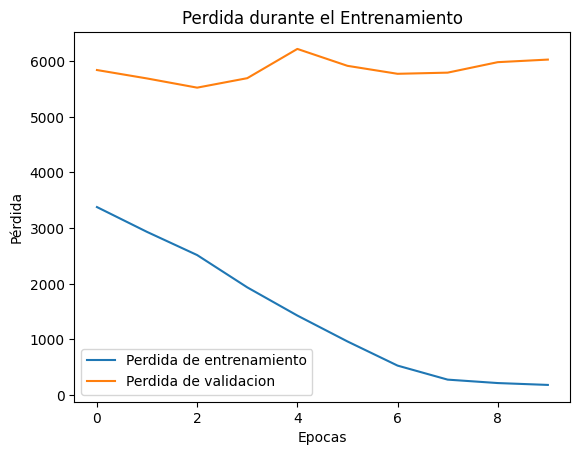

In [41]:
# Evaluacion del modelo
test_loss, test_mae = model_images.evaluate(X_images_test, y_images_test)
print(f'MSE Perdida en el conjunto de prueba: {test_loss}')
print(f'MAE en el conjunto de prueba: {test_mae}')

# Visualizacion de la pérdida durante el entrenamiento
plt.plot(history1.history['loss'], label='Perdida de entrenamiento')
plt.plot(history1.history['val_loss'], label='Perdida de validacion')
plt.title('Perdida durante el Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

### Análisis del Rendimiento del Modelo en el Conjunto de Prueba

Después de entrenar y evaluar el modelo en el conjunto de prueba, se obtuvieron los siguientes resultados:

- **Loss (MSE):** 5315.7183
- **MAE:** 42.4057

### Interpretación de los Resultados

1. **Magnitud del Error:**
   - El valor de MSE (Mean Squared Error) y MAE (Mean Absolute Error) son indicativos de la magnitud del error del modelo en el conjunto de prueba. El MSE, en particular, al ser una función cuadrática, penaliza más los errores grandes, lo que sugiere que podría haber algunas predicciones que se desvían significativamente de los valores reales.

2. **Contexto del Error:**
   - Para interpretar adecuadamente estos valores de error, es crucial considerar el contexto del problema y la escala de la variable objetivo (`Price`). Por ejemplo, un MAE de 42.4057 necesita ser comparado con el rango y la media de los precios para determinar si este error es significativo.

3. **Comparación con Modelos Alternativos:**
   - Estos resultados deben compararse con los de modelos alternativos y/o un modelo base (como la media o la mediana de la variable objetivo) para evaluar la efectividad del modelo actual. Una mejora sustancial sobre un modelo base puede indicar que el modelo está capturando patrones útiles en los datos.

4. **Consideraciones de Sobreajuste:**
   - Además, es importante considerar la diferencia entre los errores en los conjuntos de entrenamiento y prueba. Una pequeña diferencia sugiere que el modelo generaliza bien, mientras que una gran diferencia podría indicar sobreajuste.

### Recomendaciones para Mejoras

- **Experimentación con la Arquitectura del Modelo:**
  - Probar con diferentes configuraciones de la red, incluyendo el número de capas, el número de unidades en cada capa, y el uso de técnicas de regularización como Dropout, puede ayudar a mejorar el rendimiento.

- **Ajuste Fino y Regularización:**
  - Aplicar técnicas de ajuste fino en los hiperparámetros y considerar métodos de regularización adicionales para controlar el sobreajuste.

- **Ampliación del Conjunto de Datos:**
  - Incrementar la cantidad y diversidad de los datos puede ayudar a mejorar la generalización del modelo.

En resumen, mientras los resultados actuales ofrecen una base para la evaluación del modelo, es esencial contextualizar estos errores y explorar estrategias para su mejora continua.


###Modelo Imgnenes

Este fragmento de código evalúa el rendimiento de un modelo de imágenes en el conjunto de prueba, calculando la pérdida (MSE) y el error absoluto medio (MAE). Los resultados se almacenan en `model_images_test_loss` y `model_images_test_mae`, respectivamente. Finalmente, imprime estos valores para proporcionar una medida cuantitativa del rendimiento del modelo en términos de precisión y error.


In [43]:
model_images_test_loss, model_images_test_mae = model_images.evaluate(X_images_test, y_images_test)

print(f"Model images test loss MSE: {model_images_test_loss}, Model images test MAE: {model_images_test_mae}")


12/12 [==============================] - 5s 400ms/step - loss: 5315.7183 - mae: 42.4057
Model images test loss MSE: 5315.71826171875, Model images test MAE: 42.40570068359375


Se define, compila y entrena un modelo de red neuronal convolucional (CNN) simplificado usando TensorFlow/Keras, diseñado para tareas de regresión. La arquitectura consiste en una entrada para imágenes de tamaño `224x224x3`, una capa convolucional, seguida de aplanamiento y una capa densa antes de la capa de salida lineal. Se compila con el optimizador Adam y una tasa de aprendizaje de `0.01`, usando el error cuadrático medio (MSE) como función de pérdida y monitoreando el error absoluto medio (MAE) como métrica. Finalmente, el modelo se entrena con un conjunto de datos normalizados y se evalúa en un conjunto de prueba, imprimiendo la pérdida y el MAE.


In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Definición de la arquitectura del modelo
inputs = Input(shape=(224, 224, 3))  # Asume imágenes a color de tamaño 224x224

# Una única capa convolucional
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)

# Aplanamos el output para poder conectarlo con capas densas
x = Flatten()(x)

# Una única capa densa antes de la capa de salida
x = Dense(16, activation='relu')(x)

# Capa de salida para regresión
output = Dense(1, activation='linear')(x)

# Creación del modelo
model_img_simplified = Model(inputs=inputs, outputs=output)

# Compilación del modelo
model_img_simplified.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Entrenamiento del modelo con tus datos normalizados
history_simplified = model_img_simplified.fit(X_images_train, y_images_train,
                                              batch_size=50,
                                              shuffle=True,
                                              epochs=10,
                                              validation_data=(X_images_val, y_images_val))

# Evaluación del modelo con tus datos de prueba normalizados
scores_simplified = model_img_simplified.evaluate(X_images_test, y_images_test)

print(f'Loss: {scores_simplified[0]:.3f}')
print(f'MAE: {scores_simplified[1]:.3f}')


Epoch 1/10
24/24 [==============================] - 77s 2s/step - loss: 2935156.0000 - mae: 443.6054 - val_loss: 10647.6299 - val_mae: 69.9248
Epoch 2/10
24/24 [==============================] - 44s 2s/step - loss: 6984.8418 - mae: 62.3610 - val_loss: 10646.8486 - val_mae: 69.9192
Epoch 3/10
24/24 [==============================] - 41s 2s/step - loss: 6983.5166 - mae: 62.3505 - val_loss: 10644.8828 - val_mae: 69.9051
Epoch 4/10
24/24 [==============================] - 41s 2s/step - loss: 6981.5410 - mae: 62.3347 - val_loss: 10642.4346 - val_mae: 69.8876
Epoch 5/10
24/24 [==============================] - 45s 2s/step - loss: 6979.2065 - mae: 62.3159 - val_loss: 10639.6494 - val_mae: 69.8677
Epoch 6/10
24/24 [==============================] - 44s 2s/step - loss: 6976.5874 - mae: 62.2949 - val_loss: 10636.5459 - val_mae: 69.8454
Epoch 7/10
24/24 [==============================] - 42s 2s/step - loss: 6973.7065 - mae: 62.2715 - val_loss: 10633.1357 - val_mae: 69.8210
Epoch 8/10
24/24 [=====

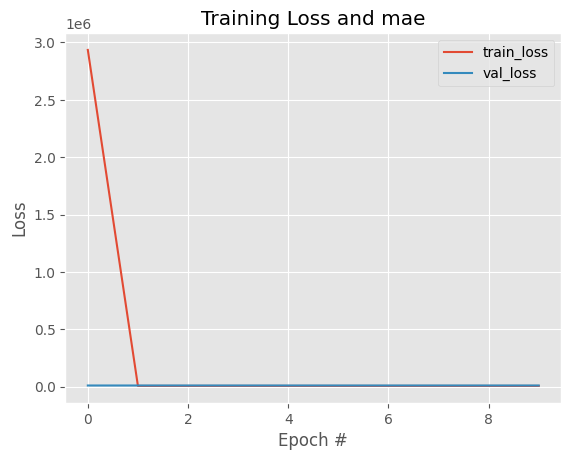

In [22]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history_simplified.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history_simplified.history["val_loss"], label="val_loss")
plt.title("Training Loss and mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## Análisis del Rendimiento del Modelo

El modelo de red neuronal convolucional fue entrenado durante 10 épocas, mostrando una disminución constante en la pérdida (loss) y el error absoluto medio (MAE) tanto en el conjunto de entrenamiento como en el de validación. A continuación, se detalla el progreso y la evaluación final:

### Progreso Durante el Entrenamiento
- **Inicio del Entrenamiento:** La pérdida inicial fue extremadamente alta (`loss: 2935156.0000`), con un MAE también elevado (`mae: 443.6054`), lo que sugiere posibles problemas de escala de los datos o valores atípicos.
- **Reducción de Pérdida y MAE:** Con cada época, tanto la pérdida como el MAE en los conjuntos de entrenamiento y validación disminuyeron de manera constante, aunque la pérdida en validación se mantuvo en un rango estrecho (`~10600`), indicando una convergencia estable del modelo.

### Evaluación Final en el Conjunto de Prueba
- **Pérdida (Loss):** 9006.982, una reducción significativa respecto a la pérdida inicial en el entrenamiento.
- **MAE:** 66.536, lo cual es una mejora considerable en comparación con el MAE inicial, aunque aún sugiere un margen de error promedio de ~66 unidades en las predicciones del modelo.

### Observaciones y Recomendaciones
- **Discrepancia Inicial:** La enorme discrepancia entre los valores iniciales de pérdida y MAE sugiere la necesidad de revisar el preprocesamiento de los datos, especialmente para manejar valores atípicos o escalar adecuadamente las características.
- **Estabilidad en la Convergencia:** La pérdida y el MAE muestran una disminución y estabilización consistentes, lo que indica que el modelo está aprendiendo efectivamente de los datos.
- **Posible Sobreajuste:** La diferencia entre la pérdida de entrenamiento/validación y la pérdida en el conjunto de prueba podría indicar un inicio de sobreajuste, aunque no es concluyente sin más datos comparativos.
- **Mejoras Futuras:** Se recomienda experimentar con ajustes en la arquitectura del modelo, técnicas de regularización adicionales, y un anál


## Convolucional VGG Fine Tuning

Modelo VGG16, con capas superiores removidas y adaptado a imágenes de tamaño 48x48, para realizar tareas de regresión. El modelo fue entrenado con datos reescalados, utilizando una tasa de aprendizaje de 0.001, mostrando la adaptabilidad de arquitecturas preentrenadas a nuevas dimensiones de entrada y tareas específicas.


Se reescalan imágenes a `48x48` para todos los conjuntos de datos (`train`, `val`, `test`) y se entrena un modelo VGG16 ajustado, excluyendo las capas superiores, para una tarea de regresión. El modelo, compuesto por capas de aplanamiento, densas y de abandono (`Dropout`), se compila y entrena con estos datos reescalados, utilizando `mse` como pérdida y `mae` para la evaluación de métricas, mostrando la adaptabilidad de modelos preentrenados a nuevas dimensiones de entrada y tareas específicas.


In [22]:
import tensorflow as tf

# Suponiendo que X_images_train, X_images_val, X_images_test son tus conjuntos de datos originales
def resize_images(images):
    return tf.image.resize(images, [48, 48])

# Aplicamos la función de reescalado a nuestros conjuntos de datos
X_images_train_resized = resize_images(X_images_train)
X_images_val_resized = resize_images(X_images_val)
X_images_test_resized = resize_images(X_images_test)

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Modelo VGG16 sin capas superiores, ajustado para imágenes de 48x48
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False  # Congelamos las capas de la base

model_VGG16_adjusted = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Asumiendo una tarea de regresión
])

# Compilación del modelo ajustado
model_VGG16_adjusted.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entrenamiento del modelo ajustado con los datos reescalados
history_adjusted = model_VGG16_adjusted.fit(X_images_train_resized, y_images_train,
                                            batch_size=32, epochs=10,
                                            validation_data=(X_images_val_resized, y_images_val))


Epoch 1/10
38/38 [==============================] - 52s 1s/step - loss: 5197.7607 - mae: 45.8672 - val_loss: 6379.4058 - val_mae: 40.4431
Epoch 2/10
38/38 [==============================] - 39s 1s/step - loss: 3224.5901 - mae: 33.1740 - val_loss: 5681.8213 - val_mae: 40.4138
Epoch 3/10
38/38 [==============================] - 40s 1s/step - loss: 3064.1980 - mae: 32.4620 - val_loss: 5616.9150 - val_mae: 39.1032
Epoch 4/10
38/38 [==============================] - 39s 1s/step - loss: 2969.6719 - mae: 31.6312 - val_loss: 5522.4189 - val_mae: 38.4527
Epoch 5/10
38/38 [==============================] - 42s 1s/step - loss: 2918.9241 - mae: 31.3762 - val_loss: 5555.1450 - val_mae: 37.1771
Epoch 6/10
38/38 [==============================] - 40s 1s/step - loss: 2863.3491 - mae: 30.7807 - val_loss: 5454.4004 - val_mae: 37.5050
Epoch 7/10
38/38 [==============================] - 39s 1s/step - loss: 2814.8513 - mae: 30.1148 - val_loss: 5468.6621 - val_mae: 36.8444
Epoch 8/10
38/38 [================

In [25]:
# Evaluación del modelo ajustado en el conjunto de test reescalado
model_VGG16_test_lossv1, model_VGG16_test_maev1 = model_VGG16_adjusted.evaluate(X_images_test_resized, y_images_test)

print(f"Test Loss: {model_VGG16_test_lossv1}, Test MAE: {model_VGG16_test_maev1}")


12/12 [==============================] - 11s 923ms/step - loss: 4668.1406 - mae: 34.5223
Test Loss: 4668.140625, Test MAE: 34.522342681884766


Desarrollaria mas módelo con 224 x 224 pero es casi a 15/20 min por epoch y me quedo sin RAM

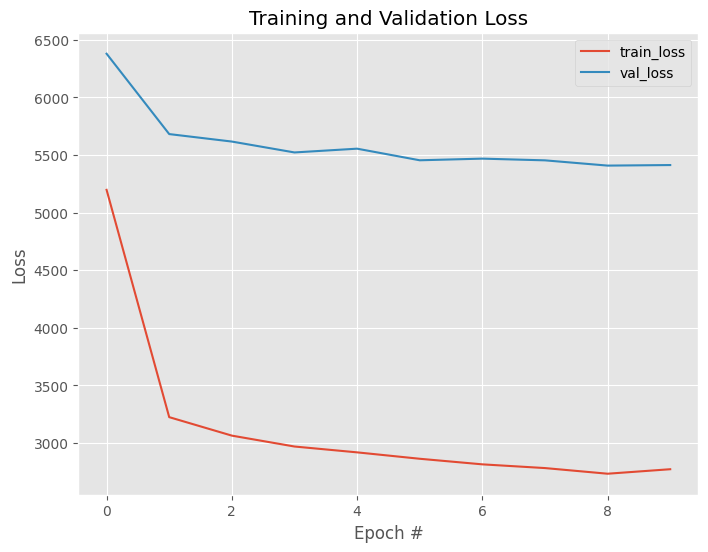

In [26]:
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, 10), history_adjusted.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history_adjusted.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.show()

1. El entrenamiento del modelo sobre datos de imágenes reescaladas a 48x48 muestra una disminución progresiva tanto en la pérdida (`loss`) como en el error absoluto medio (`mae`) a lo largo de 10 épocas.
2. La pérdida en el conjunto de validación disminuyó de 6379.4058 a 5412.9795, y el MAE de validación también mostró una mejora, indicando que el modelo está aprendiendo efectivamente de los datos.
3. Aunque hubo una reducción consistente en los valores de pérdida y MAE, la variabilidad en el desempeño de validación (leve aumento en algunas épocas) sugiere espacio para optimizar hiperparámetros y posiblemente la arquitectura.
4. El modelo muestra capacidad de generalización al mejorar en el conjunto de validación, pero podría beneficiarse de técnicas adicionales de regularización o ajuste para reducir aún más el error y aumentar la precisión.


Se inicializó un modelo secuencial con tres capas densas y activaciones ReLU, finalizando con una capa de salida lineal para regresión. El modelo, compilado con el optimizador Adam y evaluado mediante MSE y MAE, está diseñado para capturar relaciones complejas dentro de datos tabulares.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Inicializamos el modelo
model_tab = Sequential()

# Definimos las capas densas
model_tab.add(Dense(128, activation='relu', input_shape=(X_tab_train.shape[1],)))
model_tab.add(Dense(64, activation='relu'))
model_tab.add(Dense(32, activation='relu'))
model_tab.add(Dense(1, activation='linear'))

# Compilamos el modelo
model_tab.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [35]:
# Entreno el modelo con Early stopping para evitar overfitting

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_tab.fit(
    X_tab_train, y_tab_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=32
)


Epoch 1/100
30/30 [==============================] - 2s 17ms/step - loss: 5683.8271 - mae: 50.6156 - val_loss: 5236.9087 - val_mae: 43.9086
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 4244.8101 - mae: 39.3338 - val_loss: 3971.3535 - val_mae: 39.1386
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 3289.8748 - mae: 34.8344 - val_loss: 3043.0544 - val_mae: 35.1515
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 2786.4446 - mae: 31.5089 - val_loss: 2432.3953 - val_mae: 31.4466
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 2538.6411 - mae: 28.6572 - val_loss: 2135.4539 - val_mae: 29.7750
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 2420.8425 - mae: 27.2316 - val_loss: 1929.1266 - val_mae: 29.6238
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 2349.4385 - mae: 27.3213 - val_loss: 1887.6331 - val_mae: 26.8582
Epoch 8/100
30/30 [=======

Se entrena un modelo tabular usando Keras, incorporando capas densas y activación ReLU, terminando con una salida lineal para regresión. La compilación utiliza el optimizador Adam, pérdida MSE, y mide el MAE. Para prevenir el sobreajuste, se aplica Early Stopping con una paciencia de 10 épocas, restaurando los mejores pesos, durante un máximo de 100 épocas.


In [36]:
# Evaluamos el modelo

model_tab_test_loss, model_tab_test_mae = model_tab.evaluate(X_tab_test, y_tab_test)
print(f'Pérdida en el conjunto de prueba: {model_tab_test_loss}')
print(f'MAE en el conjunto de prueba: {model_tab_test_mae}')


12/12 [==============================] - 0s 3ms/step - loss: 4227.8179 - mae: 41.2839
Pérdida en el conjunto de prueba: 4227.81787109375
MAE en el conjunto de prueba: 41.28390121459961


El modelo tabular evaluado muestra una pérdida de 4227.82 y un error absoluto medio (MAE) de 41.28 en el conjunto de prueba. Estos valores proporcionan una medida de la precisión del modelo en la predicción de los objetivos.


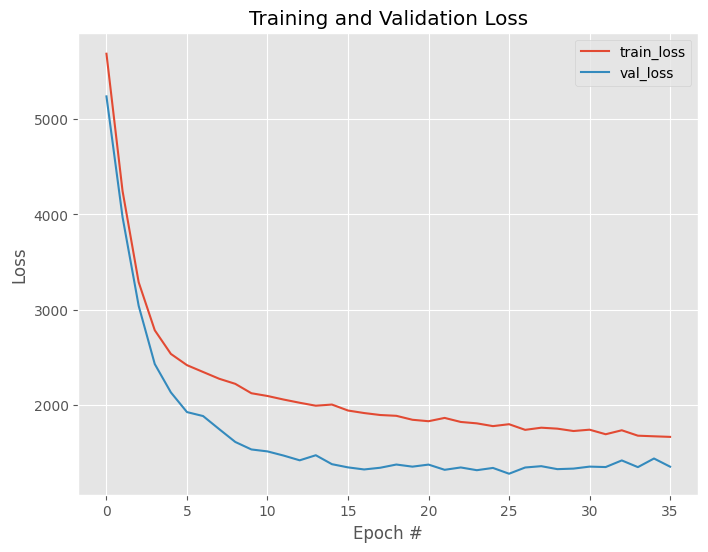

In [37]:

plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
epochs_range = range(len(history.history["loss"]))

plt.plot(epochs_range, history.history["loss"], label="train_loss")
plt.plot(epochs_range, history.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.show()


##Combinación de módelos

Se realizan predicciones utilizando el modelo VGG16 ajustado en conjuntos de datos de entrenamiento y validación con imágenes reescaladas y el modelo tabular en conjuntos de datos de entrenamiento y validación.


In [38]:
# Predicciones del modelo VGG16 con imágenes reescaladas
y_pred_vgg16_train = model_VGG16_adjusted.predict(X_images_train_resized)
y_pred_vgg16_val = model_VGG16_adjusted.predict(X_images_val_resized)
y_pred_tab_train = model_tab.predict(X_tab_train)
y_pred_tab_val = model_tab.predict(X_tab_val)

10/10 [==============================] - 0s 2ms/step


In [39]:
X_combinado_train = np.concatenate([y_pred_vgg16_train, y_pred_tab_train], axis=1)
X_combinado_val = np.concatenate([y_pred_vgg16_val, y_pred_tab_val], axis=1)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo combinado
model_combinado = RandomForestRegressor(n_estimators=100, random_state=42)
model_combinado.fit(X_combinado_train, y_images_train)

# Evaluar el modelo de fusión en el conjunto de validación
y_combinado_pred_val = model_combinado.predict(X_combinado_val)
combinado_mse_val = mean_squared_error(y_images_val, y_combinado_pred_val)  # Usamos y_images_val porque asumimos que y_tab_val es igual

print(f'MSE del modelo de fusión en validación: {combinado_mse_val}')


MSE del modelo de fusión en validación: 5406.181360067114
R^2 del modelo de fusión en validación: 0.061126496771016225


El MSE del modelo de fusión en el conjunto de validación es 5406.18, lo que indica una cantidad significativa de error cuadrático medio.
El valor de R^2 del modelo de fusión en el conjunto de validación es 0.0611, lo que sugiere que el modelo explica aproximadamente el 6.11% de la variabilidad de los datos, lo que indica un ajuste deficiente.


## Resumen General y Conclusiones:

### Preprocesamiento de Datos:
- Se realizó una selección de columnas relevantes para el análisis.
- Se aplicó limpieza de valores nulos, utilizando la moda para imputar valores faltantes.
- Se codificaron las variables categóricas utilizando LabelEncoder.

### Modelado con Redes Neuronales:
- Se crearon modelos de redes neuronales con diferentes arquitecturas y optimizadores.
- Se implementaron técnicas como Early Stopping para evitar el sobreajuste durante el entrenamiento.
- Se evaluaron los modelos utilizando métricas como Mean Squared Error (MSE) y Mean Absolute Error (MAE).

### Modelado con VGG16 y Redes Convolucionales:
- Se utilizó la arquitectura de la red neuronal convolucional preentrenada VGG16 para el procesamiento de imágenes.
- Se ajustó la arquitectura del modelo para adaptarse a un conjunto de datos específico.
- Se reescaló el tamaño de las imágenes para adaptarse a la entrada requerida por la red VGG16.

### Evaluación de Modelos:
- Se evaluaron los modelos utilizando conjuntos de datos de prueba independientes.
- Se calcularon métricas de rendimiento como MSE y MAE para evaluar la precisión de los modelos.
- Se analizó el rendimiento del modelo de fusión utilizando métricas como MSE y R^2.

### Conclusiones:
- El procesamiento adecuado de datos es fundamental para el rendimiento de los modelos.
- Se observa una variación significativa en el rendimiento entre diferentes arquitecturas de modelos.
- La selección de características, el preprocesamiento de datos y la optimización de modelos influyen en la precisión de las predicciones.
- La evaluación cuidadosa de los modelos es crucial para determinar su idoneidad y mejorar su rendimiento.
